Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "Wasif Khan"
COLLABORATORS = "ChatGPT and Google Colab" 

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [1]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [1]:
#(1 points) Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

In [2]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [10]:
#df_target.head(50)

In [3]:
df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_target.tail()

,target
145,2
146,2
147,2
148,2
149,2


In [6]:
df = pd.concat([df_data, df_target], axis=1)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#(1 points) Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

C:\Users\16475\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


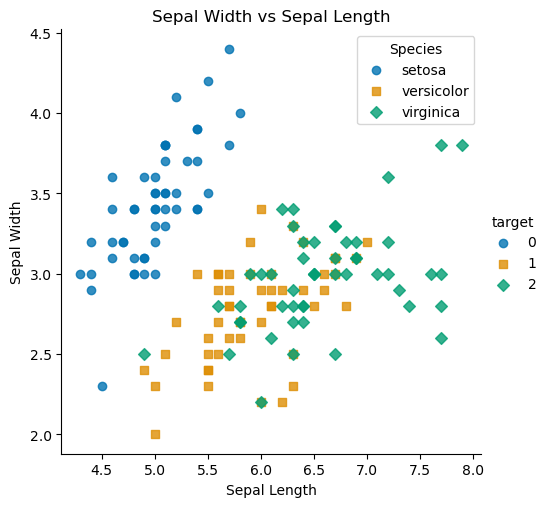

C:\Users\16475\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


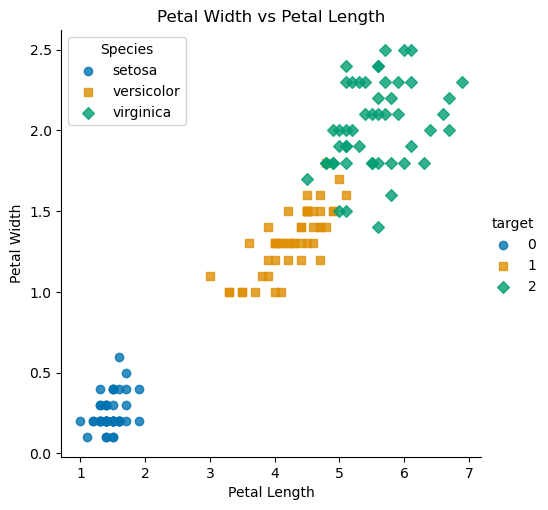

In [7]:
# Define the species names
species_names = ['setosa', 'versicolor', 'virginica']

# Plot sepal width vs sepal length
sns.lmplot(x='sepal_length', y='sepal_width', data=df, hue='target', palette='colorblind', hue_order=[0, 1, 2], markers=['o', 's', 'D'], fit_reg=False)
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species', labels=species_names)
plt.show()

# Plot petal width vs petal length
sns.lmplot(x='petal_length', y='petal_width', data=df, hue='target', palette='colorblind', hue_order=[0, 1, 2], markers=['o', 's', 'D'], fit_reg=False)
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species', labels=species_names)
plt.show()

In [4]:
#(2 points) Prepare the data for classification.

#Using the pandas operators prepare the feature variables X and the response Y for the fit. Note that sklean expects data as arrays, so convert extracted columns into arrays.
#(1 point) Split the data into train and test using sklearn train_test_split function.

In [8]:
# Extract feature variables (X) and response variable (Y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
Y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (120, 4)
Y_train shape: (120,)
X_test shape: (30, 4)
Y_test shape: (30,)


In [5]:
#(2 points) Run the fit using KNeighborsClassifier from sklearn.neighbors.

#First, instantiate the model,
#Then, run the classifier on the training set.

In [9]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as per your choice

# Train the classifier on the training set
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
print('Accuracy on training data: ' + str("{:.2%}".format(knn.score(X_train, Y_train))))

Accuracy on training data: 95.00%


In [ ]:
#(3 points) Use learning model to predict the class from features, run prediction on X from test part.

#Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.
#Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).

In [11]:
from sklearn.metrics import accuracy_score

# Use the trained model to predict classes from features
Y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

# Count the number of correct predictions
correct_predictions = np.count_nonzero(Y_pred == Y_test)

# Count the number of wrong predictions
wrong_predictions = len(Y_test) - correct_predictions

# Print accuracy score and the number of correct and wrong predictions
print("Accuracy Score:", accuracy)
print("Number of Correct Predictions:", correct_predictions)
print("Number of Wrong Predictions:", wrong_predictions)

Accuracy Score: 1.0
Number of Correct Predictions: 30
Number of Wrong Predictions: 0


In [ ]:
#(4 points) In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:
'''
Generate 10 random train/test splits for each value of k
Fit the model for each split and generate predictions
Average the accuracy score for each k
Calculate the average number of correct predictions for each k as well
Plot the accuracy score for different values of k. What conclusion can you make based on the graph?
'''

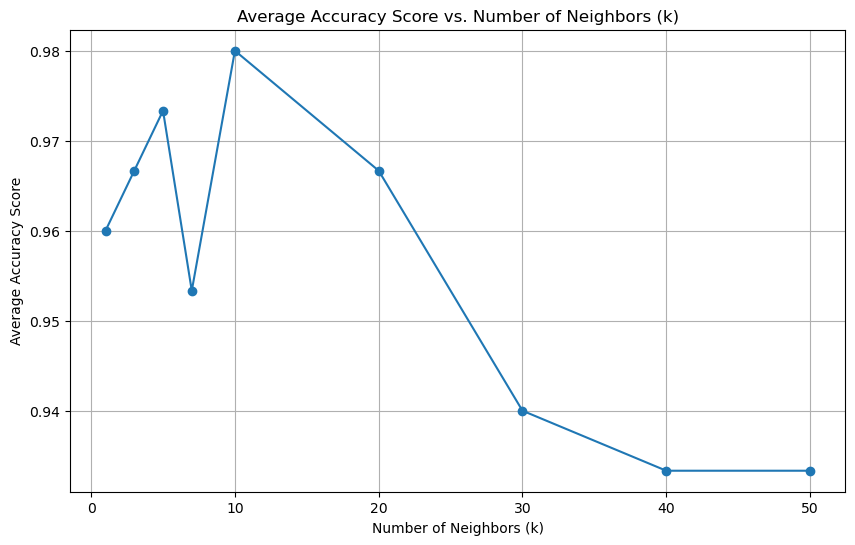

In [12]:
#import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score

# Define the list of k values
k_values = [1, 3, 5, 7, 10, 20, 30, 40, 50]

# Initialize lists to store average accuracy scores and average number of correct predictions for each k
avg_accuracy_scores = []
avg_correct_predictions = []

# Perform 10 random train/test splits for each k
for k in k_values:
    accuracy_scores = []
    correct_predictions = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # Instantiate the KNN classifier with current k value
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        
        # Predict classes
        Y_pred = knn.predict(X_test)
        
        # Calculate accuracy score
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracy_scores.append(accuracy)
        
        # Calculate number of correct predictions
        correct = np.count_nonzero(Y_pred == Y_test)
        correct_predictions.append(correct)
    
    # Calculate average accuracy score and average number of correct predictions for current k
    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    avg_accuracy_scores.append(avg_accuracy)
    
    avg_correct = sum(correct_predictions) / len(correct_predictions)
    avg_correct_predictions.append(avg_correct)

# Plot the average accuracy score for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_scores, marker='o')
plt.title('Average Accuracy Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy Score')
plt.grid(True)
plt.show()

In [24]:
'''
Based on the graph of average accuracy score vs. number of neighbors (k), you can observe how the performance of the KNN classifier changes with different values of k. 
Typically, there's a trade-off between bias and variance: a lower value of k (e.g., 1 or 3) tends to overfit the training data, resulting in high variance but low bias, 
while a higher value of k (e.g., 20, 30, 40, or 50) tends to have lower variance but higher bias. Therefore, it's important to choose an appropriate value of k that balances bias 
and variance to achieve better generalization performance on unseen data.

K have a value of 9 has the highest Accuracy score. 

'''

"\nBased on the graph of average accuracy score vs. number of neighbors (k), you can observe how the performance of the KNN classifier changes with different values of k. \nTypically, there's a trade-off between bias and variance: a lower value of k (e.g., 1 or 3) tends to overfit the training data, resulting in high variance but low bias, \nwhile a higher value of k (e.g., 20, 30, 40, or 50) tends to have lower variance but higher bias. Therefore, it's important to choose an appropriate value of k that balances bias \nand variance to achieve better generalization performance on unseen data.\n\nK have a value of 9 has the highest Accuracy score. \n\n"

In [13]:
from sklearn.model_selection import GridSearchCV
param = range(3, 50, 2)
Knn = KNeighborsClassifier()

grid = GridSearchCV(Knn, {'n_neighbors': param})

best_knn = grid \
    .fit(X_train,Y_train) \
    .best_estimator_

best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

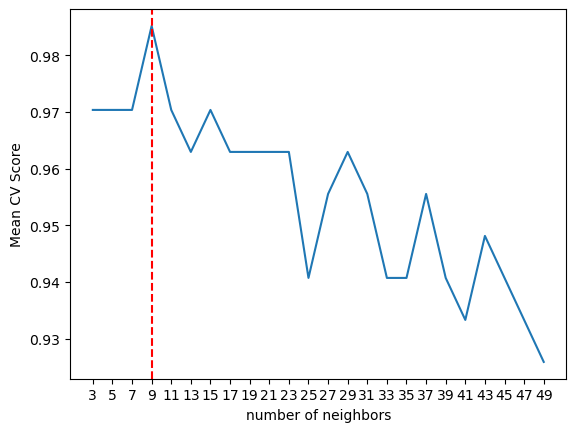

In [14]:
plt.plot(param, grid.cv_results_['mean_test_score'])

plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('number of neighbors')

plt.axvline(
    x=best_knn.n_neighbors,
    color='red',
    ls='--')

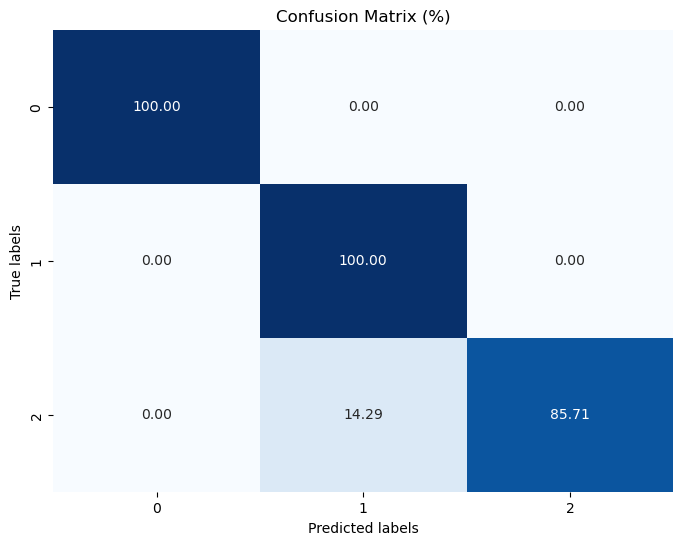

In [15]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_tst, y_trn)

# Predict on test data
y_pred = best_knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Normalize confusion matrix to get percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (%)')
plt.show()


In [ ]:
'''The only false negetive are "Iris-virginica" by 14.29% '''